<a href="https://colab.research.google.com/github/AbhishekMajhi/DeepLearning-Using-Tensorflow/blob/master/RNN/Cancer_detection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description



#### The dataset consists of features that describe characteristics of the cell nuclei present in a digitised image, these features are defined as follows:

* **Radius:** the average distance from the center of the nucleus to each of the boundary points
* **Texture:** the standard deviation of the gray-scale values, the gray-scale value represents the intensity of the shades of gray in each pixel of the image
* **Perimeter:** the total distance of the boundary of the cell nucleus
* **Area:** the number of pixels on the interior of the boundary and adding one-half of the pixels on the perimeter, to correct for the error caused by digitisation
* **Smoothness:** the difference between the length of a radius length and the mean length of the two radius lines surrounding it, hence the local variation in radius lengths
* **Compactness:** the perimeter and area are combined to obtain a measure of compactness of the cell nuclei
* **Concavity:** the severity of concave portions of the contour, a high concavity means that the boundary of the cell nucleus has indentations, and thus is rather rough than smooth
* **Concave points:** the number of concave portions of the contour of the cell nucleus
* **Symmetry:** the symmetry is determined by first finding the longest line from boundary point to boundary point through the center of the nucleus, subsequently the relative length differences between the lines perpendicular to the longest line to the boundary in both directions are measured, attention should be given to nuclei where the longest line cuts through the boundary because of concavity
* **Fractal dimension:** the fractal dimension is approximated by the "coastline approximation", the perimeter of the nucleus can be measured using different lengths of measuring sticks, as this length increases, the total length of the measured "coastline" decreases due to lower precision of the measurement, the theoretical fractal dimension is then determined by dividing the logarithm of the observed perimeter L(s) by the logarithm of the measuring stick length s, plotting log(L(s)) against log(s) and determining the negative value of the slope results in an approximation of the fractal dimension D, finally, the desired feature is determined by the calculation D - 1.



### Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#from sklearn.datasets import load_breast_cancer

In [ ]:
cancer_data = pd.read_csv('data.csv')

In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
sample = cancer_data.head(20)

In [ ]:
# import dataframe_image as dfi
# dfi.export(sample, 'dataframe.png',max_cols=33)

**So we will have 2 classs to predict.**

In [ ]:
# Lets check for null value in our data set
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Hopefully there is no null value in our data set.

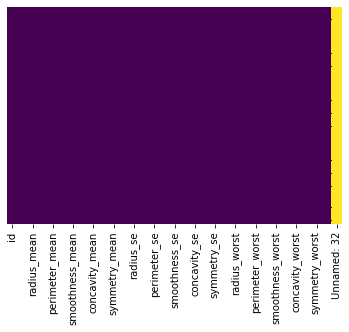

In [ ]:
# Lets see it visually.
sns.heatmap(cancer_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see no missing data.

#### Some preprocessing on our data frame..

In [ ]:
cancer_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

So here our target column 'diagnosis' have to classes.


In [ ]:
cancer_data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Here we have 212 malignant cases and 357 benign cases.

As our 'diagnosis' column contains text values, we need to convert them in 0(for benign) and 1(for malignant) format

In [ ]:
cancer_data['diagnosis'].replace({'M': 1, 'B': 0}, inplace= True)

In [ ]:
cancer_data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As we can see our diagnosis column has values 0 and 1 instead of 'B' and 'M'.

## Some Data Analysis

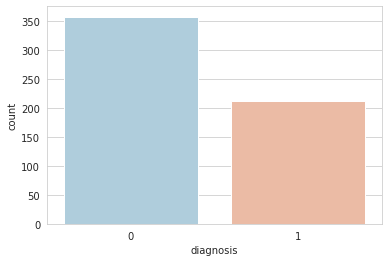

In [ ]:
# visualize data according to the malignant and benign cases.

sns.set_style('whitegrid')
sns.countplot(x = 'diagnosis', data= cancer_data,palette = 'RdBu_r')

malignant- 1 and benign -0 <br>
There is not much to do..

In [ ]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

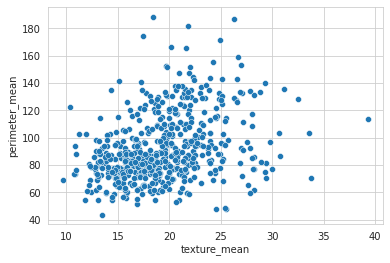

In [ ]:
sns.scatterplot(x = 'texture_mean', y = 'perimeter_mean', data = cancer_data)

### Train test split

In [ ]:
y = cancer_data.diagnosis  # label

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
x = cancer_data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis = 1)
# Here 'id', 'Unnamed: 32' are no use to us and 'diagnosis' is our target column so we droped them.

In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [ ]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.03288,0.02821,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,0.2005,0.8163,1.973,15.24,0.006773,0.02456,0.01018,0.008094,0.02662,0.004143,13.34,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
246,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,0.1630,1.6010,0.873,13.56,0.006261,0.01569,0.03079,0.005383,0.01962,0.002250,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,0.2711,0.3621,1.974,26.44,0.005472,0.01919,0.02039,0.008260,0.01523,0.002881,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.01162,0.01998,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,0.05637,0.2409,1.3670,1.477,18.76,0.008835,0.01233,0.01328,0.009305,0.01897,0.001726,13.87,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,0.6242,0.9209,4.158,80.99,0.005215,0.03726,0.04718,0.012880,0.02045,0.004028,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.70530,0.24220,0.3828,0.10070
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,0.7474,1.0160,5.029,79.25,0.010820,0.02203,0.03500,0.018090,0.01550,0.001948,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.28290,0.15200,0.2650,0.06387
337,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,0.6422,1.5300,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.4827,0.46340,0.20480,0.3679,0.09870


Here,<br>
X_train shape is (455, 30)<br>
Y_train shape is (455,)<br>
X_test.shape is (114,30)<br>
Y_test shape is (114,)

### Scale our data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # we don't wanna fit our tests data..

In [ ]:
X_train.shape

(455, 30)

### Using SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_SVC= SVC()

In [ ]:
model_SVC.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_pred = model_SVC.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(Y_test,model_pred))
print('\n')
print(classification_report(Y_test,model_pred))

[[71  1]
 [ 1 41]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve

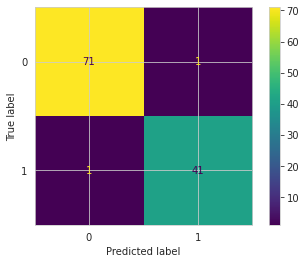

In [ ]:
plot_confusion_matrix(model_SVC, X_test, Y_test)

In [ ]:
# Accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy = (71 + 41)/(71 + 41 + 1 + 1)
print(accuracy)

0.9824561403508771


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(Y_test, model_pred)

##### plot the mse for SVM

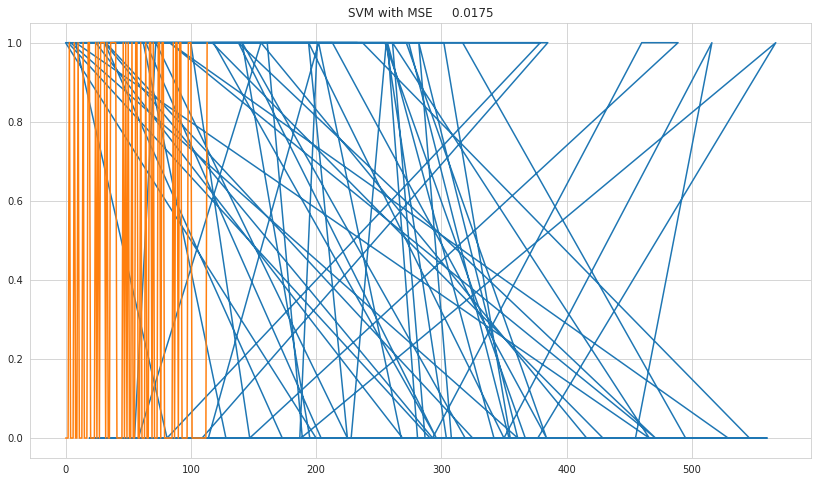

In [ ]:
plt.figure(figsize=(14,8))
plt.title('SVM with MSE {:10.4f}'.format(mse))
plt.plot(Y_test)
plt.plot(model_pred)

### Using LSTM

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam,RMSprop,Adadelta
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, BatchNormalization
import tensorflow as tf


In [ ]:
num_epochs = 300
np.random.seed(101)

In [ ]:
Y_train.shape

(455,)

In [ ]:
# Model

data = Input((X_train.shape[1],1),dtype= 'float32')  # Input layer

X = LSTM(128,return_sequences =True)(data)
X = BatchNormalization()(X)
X = Dropout(0.5)(X) 
X = LSTM(128,return_sequences = True)(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)
X = LSTM(64,return_sequences = False)(X)
X = BatchNormalization()(X)
# X = Dropout(0.2)(X)
X = Dense(units=4)(X)  
X = Dense(units=2)(X)
# use sigmoid 
X = Activation('sigmoid')(X)   # sigmoid is for binary classification and softmax for multiclass classification.
model_lstm = Model(data, X)

In [ ]:
model_lstm.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 128)           66560     
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 128)           512       
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 128)           512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0     

In [ ]:
type(model_lstm)

tensorflow.python.keras.engine.functional.Functional

In [ ]:
# don't load the model train and see for yourself.
#model_lstm.load_weights('/home/ultimatedude/Documents/Machine Learning/Code/Breast Cancer(DL)/Data and Model/Breast_cancer_LSTM_Model.h5')

In [ ]:
# fun for converting our target to one_hot vectior format.

# def convert_to_one_hot(Y, C):  # Y - target column and C- is the number of classes(here its is 2).
#     Y = np.eye(C)[Y.reshape(-1)]
#     return Y

In [ ]:
model_lstm.compile(optimizer= Adam(learning_rate= 0.001), loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
Y_train = Y_train.to_numpy() # Y_train is series here so we converted into numpy array
Y_train_oh = tf.keras.utils.to_categorical(Y_train,2)  # one_hot vec format
type(Y_train)

In [ ]:
Y_test_oh = tf.keras.utils.to_categorical(Y_test.to_numpy(),2)  # converting Y_test to one_hot vec format

In [ ]:
model_lstm.reset_states()
his_lstm = model_lstm.fit(X_train, Y_train_oh, epochs= 250, batch_size = 40, shuffle=True, verbose = 2, validation_data= (X_test,Y_test_oh))

Epoch 1/250
12/12 - 11s - loss: 0.4118 - accuracy: 0.8637 - val_loss: 0.6732 - val_accuracy: 0.6316
Epoch 2/250
12/12 - 0s - loss: 0.2724 - accuracy: 0.9099 - val_loss: 0.6576 - val_accuracy: 0.6316
Epoch 3/250
12/12 - 0s - loss: 0.2089 - accuracy: 0.9319 - val_loss: 0.6423 - val_accuracy: 0.6316
Epoch 4/250
12/12 - 0s - loss: 0.2437 - accuracy: 0.9231 - val_loss: 0.6416 - val_accuracy: 0.6316
Epoch 5/250
12/12 - 0s - loss: 0.2062 - accuracy: 0.9209 - val_loss: 0.6136 - val_accuracy: 0.6316
Epoch 6/250
12/12 - 0s - loss: 0.1826 - accuracy: 0.9451 - val_loss: 0.6146 - val_accuracy: 0.6316
Epoch 7/250
12/12 - 0s - loss: 0.1539 - accuracy: 0.9451 - val_loss: 0.5894 - val_accuracy: 0.6316
Epoch 8/250
12/12 - 0s - loss: 0.1198 - accuracy: 0.9604 - val_loss: 0.6102 - val_accuracy: 0.6316
Epoch 9/250
12/12 - 0s - loss: 0.2137 - accuracy: 0.9231 - val_loss: 0.5770 - val_accuracy: 0.6316
Epoch 10/250
12/12 - 0s - loss: 0.1681 - accuracy: 0.9341 - val_loss: 0.5973 - val_accuracy: 0.6316
Epoch 11

In [ ]:
# summarize history for accuracy
def plot_history(history):
    plt.figure(figsize = (12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize = (12,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

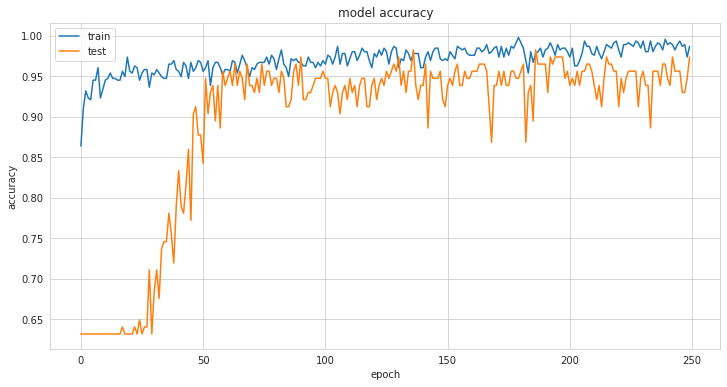

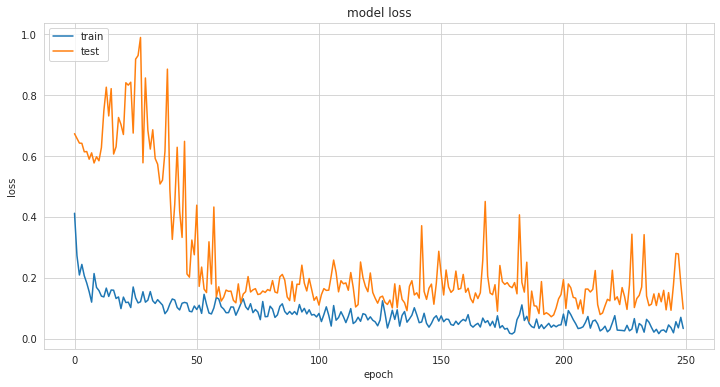

In [ ]:
plot_history(his_lstm)

### Now lets test the model

In [ ]:
loss, acc = model_lstm.evaluate(X_test, Y_test_oh)
print()
print("Test accuracy = ", acc)

4/4 [==============================] - 0s 6ms/step - loss: 0.0973 - accuracy: 0.9737

Test accuracy =  0.9736841917037964


In [ ]:
model_lstm.save('cancer_model_lstm.h5')

#### Maximum accuracy achived around 92 - 93 percent on some research papaers..
**Here we achived 94% of validation accuracy and it can be improved by**
* Training for longer period of time(here we only train our model for 300 epochs but in some places its trained for 1000 to 2000 num of epochs).
* Change the units parameter in **Dropout** layer(while using complex architecture and more number of neurons in LSTM layers its better to set max values(like 0.7, 0.8) as dropout parameter).
* Often changing learning rate can improve model performance.
* Use better data normalization technique. Here I use MinMaxScalar, we can also use StandardScaler.

#### Testing and Plotting stuffs

In [ ]:
## Dataframe to strore acc,recall,precision and specificity.
cols = ['Accuracy', 'Precision', 'Recall', 'Specificity']
#index = ['SVM', 'KNN', 'LSTM', 'GRU', 'SimpleRNN']
summary_table = pd.DataFrame(columns= cols)
summary_table

,Accuracy,Precision,Recall,Specificity


In [ ]:
def get_confusion_matrix(Y_test_oh,model_pred):
    cm = confusion_matrix(Y_test_oh.argmax(axis = 1), model_pred.argmax(axis=1))
    
    True_Positives = cm[0][0]
    False_Positives = cm[0][1]

    True_Negetives = cm[1][1]
    False_Negetives = cm[1][0]
    
    return True_Positives,False_Positives,False_Negetives,True_Negetives

In [ ]:
def get_cm_components(True_Positives,False_Positives,False_Negetives,True_Negetives):
    
    precision =  True_Positives / (True_Positives + False_Positives)
    recall = True_Positives / (True_Positives + False_Negetives)
    specificity = True_Negetives / (True_Negetives + False_Positives)
    
    return precision,recall,specificity

#### For LSTM

In [ ]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve, confusion_matrix

In [ ]:
# predictions
lstm_pred = model_lstm.predict(X_test)

In [ ]:
True_Positives,False_Positives,False_Negetives,True_Negetives = get_confusion_matrix(Y_test_oh,lstm_pred)

In [ ]:
print(True_Positives,end=' ')
print(False_Positives)
print(False_Negetives, end=' ')
print(True_Negetives)

69 3
0 42


In [ ]:
pre,rec,spe = get_cm_components(True_Positives,False_Positives,False_Negetives,True_Negetives)

In [ ]:
vals = {'Accuracy':acc,'Precision':pre,'Recall':rec,'Specificity':spe}

In [ ]:
data = pd.DataFrame(vals, index= ["LSTM"])
data

,Accuracy,Precision,Recall,Specificity
LSTM,0.973684,0.958333,1.0,0.933333


In [ ]:
summary_table = pd.concat([summary_table, data])
summary_table

,Accuracy,Precision,Recall,Specificity
LSTM,0.973684,0.958333,1.0,0.933333


### Using GRU

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam,RMSprop,Adadelta
from tensorflow.keras.layers import Activation, Dense, Dropout, Input, GRU, BatchNormalization
import tensorflow as tf

In [ ]:
# Model

data = Input((X_train.shape[1],1),dtype= 'float32')  # Input layer

X = GRU(128,return_sequences =True)(data)
X = BatchNormalization()(X)
X = Dropout(0.5)(X) 
X = GRU(128,return_sequences = True)(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)
X = GRU(64,return_sequences = False)(X)
X = BatchNormalization()(X)
#X = Dropout(0.5)(X)
X = Dense(units=4)(X)  
X = Dense(units=2)(X)
# use sigmoid 
X = Activation('sigmoid')(X)   # sigmoid is for binary classification and softmax for multiclass classification.
model_GRU = Model(data, X)

In [ ]:
model_GRU.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 30, 128)           50304     
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 128)           512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 30, 128)           99072     
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 128)           512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 128)           0   

In [ ]:
model_GRU.compile(optimizer= Adam(learning_rate= 0.001), loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist_gru = model_GRU.fit(X_train, Y_train_oh, epochs= 250, batch_size = 40, shuffle=True, verbose = 2, validation_data = (X_test,Y_test_oh))

Epoch 1/250
12/12 - 5s - loss: 0.4518 - accuracy: 0.8044 - val_loss: 0.6432 - val_accuracy: 0.6316
Epoch 2/250
12/12 - 0s - loss: 0.3016 - accuracy: 0.8901 - val_loss: 0.6361 - val_accuracy: 0.6316
Epoch 3/250
12/12 - 0s - loss: 0.2493 - accuracy: 0.9165 - val_loss: 0.6246 - val_accuracy: 0.6316
Epoch 4/250
12/12 - 0s - loss: 0.2220 - accuracy: 0.9099 - val_loss: 0.6242 - val_accuracy: 0.6316
Epoch 5/250
12/12 - 0s - loss: 0.2125 - accuracy: 0.9209 - val_loss: 0.6447 - val_accuracy: 0.6316
Epoch 6/250
12/12 - 0s - loss: 0.1884 - accuracy: 0.9429 - val_loss: 0.6730 - val_accuracy: 0.6316
Epoch 7/250
12/12 - 0s - loss: 0.1420 - accuracy: 0.9560 - val_loss: 0.6450 - val_accuracy: 0.6316
Epoch 8/250
12/12 - 0s - loss: 0.1602 - accuracy: 0.9429 - val_loss: 0.7578 - val_accuracy: 0.6316
Epoch 9/250
12/12 - 0s - loss: 0.1111 - accuracy: 0.9692 - val_loss: 0.7224 - val_accuracy: 0.6316
Epoch 10/250
12/12 - 0s - loss: 0.1287 - accuracy: 0.9582 - val_loss: 0.6674 - val_accuracy: 0.6404
Epoch 11/

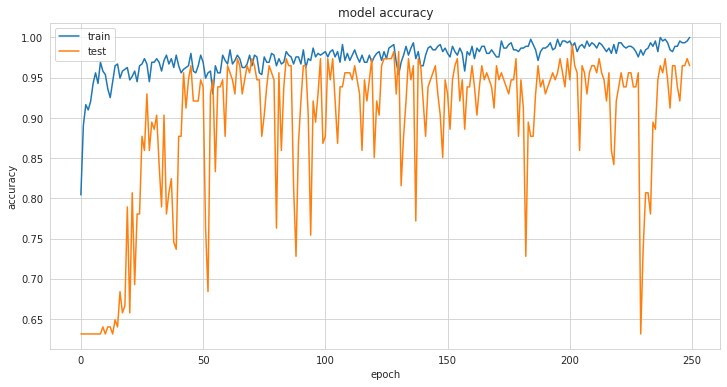

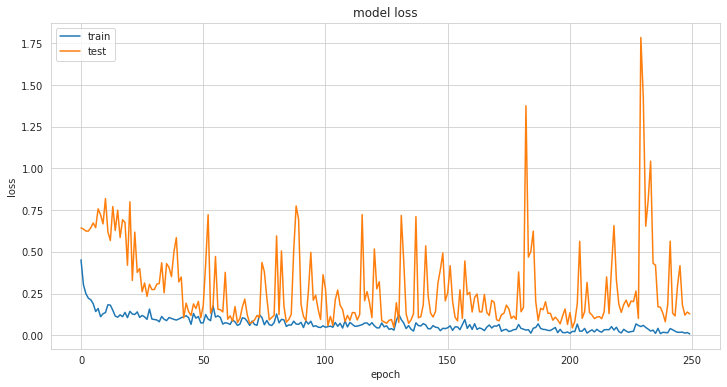

In [ ]:
# plot the loss, acc graph
plot_history(hist_gru)

#### Test GRU model

In [ ]:
# Evaluate the model..
loss, acc = model_GRU.evaluate(X_test, Y_test_oh)
print()
print("Test accuracy = ", acc)

4/4 [==============================] - 0s 6ms/step - loss: 0.1279 - accuracy: 0.9649

Test accuracy =  0.9649122953414917


In [ ]:
gru_pred = model_GRU.predict(X_test)

In [ ]:
# save the model here...
#model_GRU.save('Breast_cancer_GRU_model.h5')

In [ ]:
# Get the confusion matrix values.
True_Positives,False_Positives,False_Negetives,True_Negetives = get_confusion_matrix(Y_test_oh,gru_pred)

In [ ]:
pre,rec,spe = get_cm_components(True_Positives,False_Positives,False_Negetives,True_Negetives)

In [ ]:
# view model acc, precision, recall etc..
vals = {'Accuracy':acc,'Precision':pre,'Recall':rec,'Specificity':spe}
data = pd.DataFrame(vals, index= ["GRU"])
summary_table = pd.concat([summary_table,data])
summary_table

,Accuracy,Precision,Recall,Specificity
LSTM,0.973684,0.958333,1.000000,0.933333
SimpleRNN,0.964912,0.972222,0.972222,0.952381


### With RNN model

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam,RMSprop,Adadelta
from tensorflow.keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, BatchNormalization
import tensorflow as tf

In [ ]:
# Model

data = Input((X_train.shape[1],1),dtype= 'float32')  # Input layer

X = SimpleRNN(128, return_sequences= True)(data)
#X = BatchNormalization()(X)
X = Dropout(0.5)(X) 
X = SimpleRNN(128,return_sequences = True)(X)
#X = BatchNormalization()(X)
X = Dropout(0.5)(X)
X = SimpleRNN(64,return_sequences = False)(X)
#X = BatchNormalization()(X)
#X = Dropout(0.5)(X)
X = Dense(units=4)(X)  
X = Dense(units=2)(X)
# use sigmoid 
X = Activation('sigmoid')(X)   # sigmoid is for binary classification and softmax for multiclass classification.
model_RNN = Model(data, X)

In [ ]:
model_RNN.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 30, 128)           16640     
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30, 128)           32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260 

In [ ]:
model_RNN.compile(optimizer= RMSprop(learning_rate= 0.001), loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist_rnn = model_RNN.fit(X_train, Y_train_oh, epochs= 250, batch_size = 40, shuffle=True, verbose = 2,validation_data = (X_test,Y_test_oh))

Epoch 1/250
12/12 - 3s - loss: 0.8269 - accuracy: 0.5538 - val_loss: 0.6916 - val_accuracy: 0.6316
Epoch 2/250
12/12 - 1s - loss: 0.5546 - accuracy: 0.7582 - val_loss: 0.3897 - val_accuracy: 0.7895
Epoch 3/250
12/12 - 1s - loss: 0.4726 - accuracy: 0.8110 - val_loss: 0.2915 - val_accuracy: 0.9035
Epoch 4/250
12/12 - 1s - loss: 0.4014 - accuracy: 0.8396 - val_loss: 0.4090 - val_accuracy: 0.8246
Epoch 5/250
12/12 - 1s - loss: 0.3326 - accuracy: 0.8703 - val_loss: 0.3917 - val_accuracy: 0.8158
Epoch 6/250
12/12 - 1s - loss: 0.2898 - accuracy: 0.8945 - val_loss: 0.1913 - val_accuracy: 0.9123
Epoch 7/250
12/12 - 1s - loss: 0.2364 - accuracy: 0.9033 - val_loss: 1.1921 - val_accuracy: 0.5175
Epoch 8/250
12/12 - 1s - loss: 0.3223 - accuracy: 0.8615 - val_loss: 0.1945 - val_accuracy: 0.9123
Epoch 9/250
12/12 - 1s - loss: 0.2582 - accuracy: 0.8945 - val_loss: 0.3078 - val_accuracy: 0.8772
Epoch 10/250
12/12 - 1s - loss: 0.2197 - accuracy: 0.9099 - val_loss: 0.0991 - val_accuracy: 0.9825
Epoch 11/

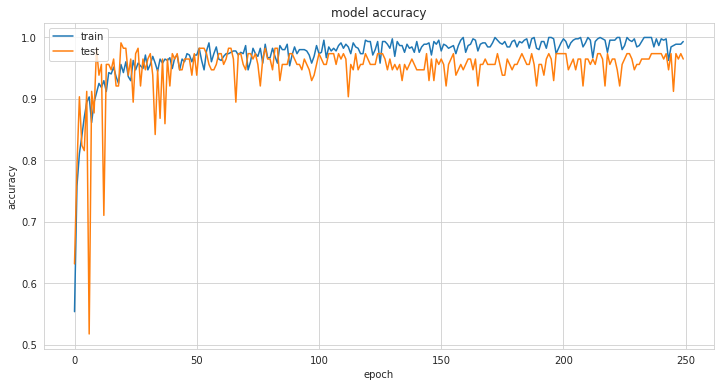

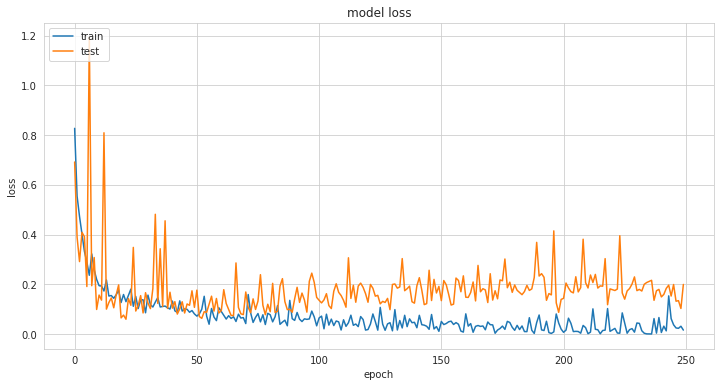

In [ ]:
# plot loss, acc graph
plot_history(hist_rnn)

In [ ]:
loss, acc = model_RNN.evaluate(X_test, Y_test_oh)
print()
print("Test accuracy = ", acc)

4/4 [==============================] - 0s 10ms/step - loss: 0.1996 - accuracy: 0.9649

Test accuracy =  0.9649122953414917


In [ ]:
rnn_pred = model_RNN.predict(X_test)

In [ ]:
# wanna save the model run this cell.
#model_RNN.save('Breast_cancer_RNN_model.h5')

In [ ]:
# Get the confusion matrix values.
True_Positives,False_Positives,False_Negetives,True_Negetives = get_confusion_matrix(Y_test_oh,rnn_pred)

In [ ]:
pre,rec,spe = get_cm_components(True_Positives,False_Positives,False_Negetives,True_Negetives)

In [ ]:
# view model acc, precision, recall etc..
vals = {'Accuracy':acc,'Precision':pre,'Recall':rec,'Specificity':spe}
data = pd.DataFrame(vals, index= ["SimpleRNN"])
summary_table = pd.concat([summary_table,data])
summary_table

,Accuracy,Precision,Recall,Specificity
LSTM,0.973684,0.958333,1.000000,0.933333
SimpleRNN,0.964912,0.972222,0.972222,0.952381
SimpleRNN,0.964912,0.958333,0.985714,0.931818


## Load the model (for 2nd time use)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('Breast_Cancer_LSTM.h5')

In [ ]:
model.compile(optimizer= Adam(learning_rate= 0.001), loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
Y_test_oh = convert_to_one_hot(Y_test.to_numpy(),2)  # converting Y_test to one_hot vec format

In [ ]:
loss, acc = model.evaluate(X_test, Y_test_oh)

4/4 [==============================] - 0s 40ms/step - loss: 0.1762 - accuracy: 0.9123


In [ ]:
pred = model.predict(X_test)

In [ ]:
mse_lstm = mean_squared_error(Y_test_oh, pred)

### Comparison between SVM and LSTM

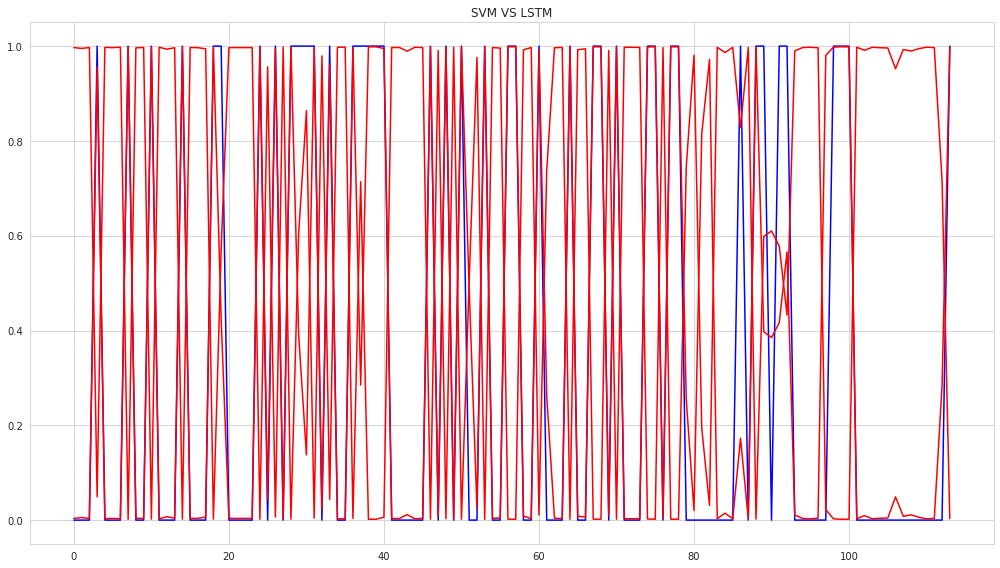

In [ ]:
# Lets see how their predictions on test dataset varies..
plt.figure(figsize=(14,8))
plt.plot(model_pred, data = X_test,color = 'b')
plt.plot(pred, data = X_test, color = 'r')
plt.title('SVM VS LSTM')
plt.tight_layout()

##  That's it.